In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Linear Regression with sigle variable

## 문제 1

### 1.1
회귀분석용 가상 데이터를 생성하는 명령어인 make_regression()을 사용하여 다음 조건을 충족하는 데이터를 생성하세요.
그 다음 feature data와 target data를 각각 X, y 변수에 저장하세요.

(조건)

* 표본의 개수(n_samples) = 1000
* 독립변수의 개수 (n_features) = 1
* y절편 (bias) = 1000
* 분포 (noise) = 50
* 시드 넘버 (random_state = 100)


In [2]:
from sklearn.datasets import make_regression

# feature data : 시리즈(열) 데이터
# target data : 정답 데이터

X,y = make_regression(n_samples=1000, 
                        n_features=1,
                        bias=1000,
                        noise=50,
                        random_state=100)
# X : [n_samples, n_features] 형상의 2차원 배열, 독립변수의 표본 데이터 행렬 𝑋
# y : [n_samples] 형상의 1차원 배열, 종속변수의 표본 데이터 벡터 𝑦
# n_samples : 정수 (옵션, 디폴트 100),표본 데이터의 갯수 𝑁
# n_features : 정수 (옵션, 디폴트 100),독립변수(feature)의 수(차원) 𝑀
# noise : 실수 (옵션, 디폴트 0.0) ,출력 즉, 종속 변수에 더해지는 정규 분포의 표준 편차
# random_state : 정수 (옵션, 디폴트 None) , 난수 발생용 시작값


1124.145754704955

### 1.2

X와 y의 타입과 형태를 각각 확인해보세요.

(Tip)
* 타입 확인에는 type()을 형태 확인에는 shape()을 사용하세요.
    - a의 타입 확인: type(a), 
    - a의 형태 확인: a.shape()


(실행 결과)

    X type: <class 'numpy.ndarray'>
    X shape: (1000, 1)
    --------------------------------------------------
    y type: <class 'numpy.ndarray'>
    y shape: (1000,)

In [3]:
import numpy as np

print('X type: ',type(X))
print('X shape: ,',np.shape(X))
print('---------------------------------------')
print('y type: ',type(y))
print('y shape: ,',np.shape(y))


X type:  <class 'numpy.ndarray'>
X shape: , (1000, 1)
---------------------------------------
y type:  <class 'numpy.ndarray'>
y shape: , (1000,)


### 1.3
pandas 라이브러리의 DataFrame()을 사용하여 앞서 생성한 데이터를 데이터프레임으로 변환하고, random_df 변수에 저장하세요.

random_df의 첫 5 샘플을 출력해보세요.

(조건)
* 칼럼 (columns) 제목은 각각 X_data, y_data로 지정하세요.

(Tip)
* DataFrame(데이터, columns=칼럼명)을 사용하세요.


(실행 결과)

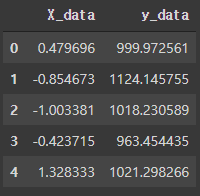

In [ ]:
import pandas as pd

X_list=[]
for i in range(0,len(X)):
  X_list.append(X[i][0])

y_list=[]
for i in range(0,len(y)):
  y_list.append(y[i])

random_df=pd.DataFrame({"X_data":X_list,"y_data":y_list})
random_df.head()


,X_data,y_data
0,0.479696,999.972561
1,-0.854673,1124.145755
2,-1.003381,1018.230589
3,-0.423715,963.454435
4,1.328333,1021.298266


### 1.4

matplotlib 라이브러리의 scatter()을 사용하여 산점도를 그려보세요.


(실행 결과)

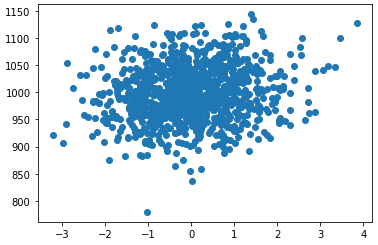

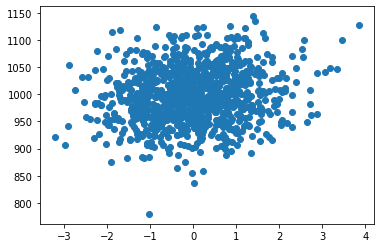

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline 

plt.scatter(X_list,y_list)
plt.show()

### 1.5

데이터를 train_test_split()을 사용하여 다음 조건을 충족하는 훈련용, 검증용 데이터로 분리하세요. 
훈련용 데이터는 X_train, y_train, 검증용 데이터는 X_test, y_test 변수에 저장하세요. 

(조건)
* shufftle = True
* 전제 데이터 중 학습 데이터의 비율 (test_size) = 0.2
* random_state = 100

In [4]:
from sklearn.model_selection import train_test_split

#훈련 75 X_train,y_train
#시험 25 X_test,y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=100)

### 1.6

LinearRegression()을 사용하여 선형회귀 모델을 로드하고 hypothesis 변수에 저장하세요. 


In [5]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

### 1.7

fit() 명령어를 통해 학습 데이터로 앞서 로드한 모델을 학습시키세요.
학습한 모델을 model_linear라는 변수에 대입하세요.

In [6]:
model_linear = hypothesis.fit(X_train,y_train)

### 1.8
model_linear의 계수(=weight)을 출력하세요.

(Tip) 
* coef_에 계수가 저장되어 있어요.

(실행 결과)

    array([6.78162406])

In [7]:
# 기울기
model_linear.coef_

array([6.78162406])

### 1.9

.intercept_
* model_linear의 bias를 출력하세요.

(Tip)
* itercept_에 bias가 저장되어 있어요.

(실행 결과)

    995.8131288981759


In [8]:
# y절편 ,bias
model_linear.intercept_

995.8131288981759

### 1.10

searborn 라이브러리의 regplot()을 Train set data의 scatter plot(산점도)와 hypothesis(선형회귀 직선)를 함께 시각화해보세요.

(실행 결과)

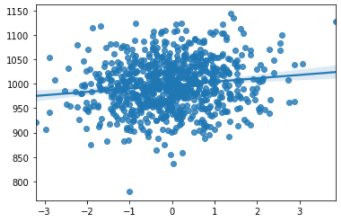

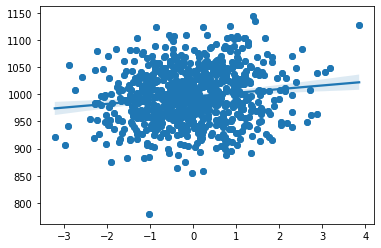

In [ ]:
import seaborn as sns

plt.scatter(X_train,y_train) # 산점도

sns.regplot(x=X_train,y=y_train) #추세선

### 1.11

searborn 라이브러리의 regplot()을 Test set data의 scatter plot(산점도)와 hypothesis(선형회귀 직선)를 함께 시각화해보세요.

(실행 결과)

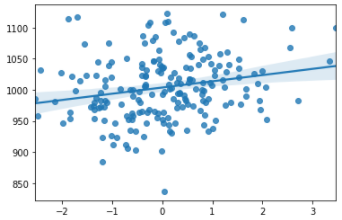

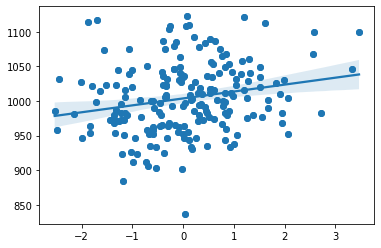

In [ ]:
plt.scatter(X_test,y_test) # 산점도

sns.regplot(x=X_test,y=y_test) #추세선

### 1.12

score()을 사용하여 학습 데이터 점수, 검증 데이터 점수를 출력하세요.

(실행 결과)

    학습 데이터 점수 : 0.02
    검증 데이터 점수 : 0.02

In [9]:
print('학습 데이터 점수 : ',round(model_linear.score(X_train,y_train),2))
print('검증 데이터 점수 : ',round(model_linear.score(X_test,y_test),2))

학습 데이터 점수 :  0.02
검증 데이터 점수 :  0.02


### 1.13

predcit() 명령어를 사용하여 y값을 예측하고 y_predict 변수에 저장하세요.

In [12]:
y_predict = model_linear.predict(X_test)
print(y_predict)

[1013.28922273  995.21849074 1001.68641662 1004.42790423 1019.3129967
  996.39990789 1002.0997183   988.02957685  995.45617832  986.66802826
  987.45522135 1009.31041657  997.43569933  992.62979236 1000.65881663
  998.93504418  988.9333609   995.27323536  999.38967393  997.26161667
 1000.98875348 1007.09460677 1001.39524915 1001.56302189  999.07026415
  994.6278261   988.55905441  999.46959373 1001.52442612 1018.4244437
 1002.27574148 1003.93356319  979.28613     991.88764602  988.10853276
 1002.00290882  984.70702848  996.73584544  993.51427002 1000.9584925
  993.83434291 1004.62753172 1000.07122709  993.69042813  996.66051981
  999.97052813  998.02862919  986.84296285 1006.38781605  989.62157854
  988.10464189  993.98971024  997.89261797 1008.23663071 1009.88359617
  989.1265777   987.92450086  986.6002727   990.84721205  987.49500969
  995.86273352 1000.80579589  997.06446529  993.65109681  993.5631411
  996.82041699  991.24526731 1002.84982568  985.31464988 1001.44743484
  987.7166

### 1.14

mse, rmse을 출력해보세요.

(Tip)
* mean_squared_error()을 사용하여 mse를 계산하세요.
* rmse를 지원하는 명령어가 없기 때문에 mse를 활용하여 rmse를 계산하세요.
* numpy 라이브러리에서 제공하는 sqrt()를 활용하여 root 계산을 수행하세요.


(실행 결과)

    MSE : 2545.624, RMSE : 50.454

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_predict,y_test)
rmse = mean_squared_error(y_predict,y_test,squared=False)
print('MSE :',round(mse,3),'RMSE :',round(rmse,3))


MSE : 2545.624 RMSE : 50.454


### 1.15

r2_score()을 사용하여 r2_score을 출력해보세요.

(실행 결과)

    R2 : 0.02

In [ ]:
from sklearn.metrics import r2_score


print('R2:',round(r2_score(y_test,y_predict),2))


R2: 0.02


# Linear Regression with multi-variable

## 문제 2

### 2.1
다음 조건을 충족하는 데이터를 생성하세요.
그 다음 feature data와 target data를 각각 X_multi, y_multi 변수에 저장하세요.

(조건)

* 표본의 개수(n_samples) = 1000
* 독립변수의 개수 (n_features) = 100
* y절편 (bias) = 1000
* 분포 (noise) = 50
* 시드 넘버 (random_state = 100)

(Tip)
* 1.1에서 사용한 make_regression()을 동일하게 사용하세요. 

In [ ]:
from sklearn.datasets import make_regression

# feature data : 시리즈(열) 데이터
# target data : 정답 데이터

X_multi,y_multi = make_regression(n_samples=1000, 
                        n_features=100,
                        bias=1000,
                        noise=50,
                        random_state=100)
# X_multi : [n_samples, n_features] 형상의 2차원 배열, 독립변수의 표본 데이터 행렬 𝑋
# y_multi : [n_samples] 형상의 1차원 배열, 종속변수의 표본 데이터 벡터 𝑦

# n_samples : 정수 (옵션, 디폴트 100),표본 데이터의 갯수 𝑁
# n_features : 정수 (옵션, 디폴트 100),독립변수(feature)의 수(차원) 𝑀
# noise : 실수 (옵션, 디폴트 0.0) ,출력 즉, 종속 변수에 더해지는 정규 분포의 표준 편차
# random_state : 정수 (옵션, 디폴트 None) , 난수 발생용 시작값

### 2.2

X_multi와 y_multi의 타입과 형태를 각각 확인해보세요.

(Tip)
* 타입 확인에는 type()을 형태 확인에는 shape()을 사용하세요.
    - a의 타입 확인: type(a), 
    - a의 형태 확인: a.shape()


(실행 결과)

    X_multi type: <class 'numpy.ndarray'>
    X_multi shape: (1000, 100)
    --------------------------------------------------
    y_multi type: <class 'numpy.ndarray'>
    y_multi shape: (1000,)

In [ ]:
import numpy as np

print('X_multi type: ',type(X_multi))
print('X_multi shape: ,',np.shape(X_multi))
print('---------------------------------------')
print('y_multi type: ',type(y_multi))
print('y_multi shape: ',np.shape(y_multi))


X_multi type:  <class 'numpy.ndarray'>
X_multi shape: , (1000, 100)
---------------------------------------
y_multi type:  <class 'numpy.ndarray'>
y_multi shape:  (1000,)


### 2.3

X_multi와 y_multi의 각 첫 번째 샘플을 출력하세요.

(Tip)

* X_multi와 y_multi의 shape은 차례대로 (1000, 100), (1000,)이며, 여기서 1000은 sample에 해당해요.


(실행 결과)


    
    input data : 
    [[-0.18794818 -0.80452892  1.58275236  0.8740244   1.23042168  0.32001387
    0.49283334  1.58546385 -1.70120605  0.61894071  0.13086206 -1.76183206
    -1.70762168  0.48550084 -0.26305064  0.36530352 -0.00955759 -0.00445508
    0.56411988 -0.46373102  0.68394006 -1.09717963 -1.58249603 -0.35268425
    -0.07630132  1.71002577 -0.8598827   0.97263652  0.96201964 -0.1955213
    0.38695809 -0.43254612 -0.63310736 -0.41308176  0.10268749 -1.88071085
    -0.41062698 -1.6817716  -1.2038741   0.85668449  0.28176583 -0.51081849
    0.99333812 -0.83069445 -1.33428336  0.57162436  0.05425755  0.15520058
    -0.10782144 -0.32797025 -0.14127407  1.43949855  1.51444128 -0.59053581
    -1.55158985 -1.06721273  0.77244131 -1.13419279 -0.32242785 -0.29176367
    -0.41256393  0.32821276 -0.97436055 -1.2776086   0.53031866  0.44428791
    -1.31201183 -0.68761264  1.57760366 -0.12721726 -0.36294323 -1.01469906
    0.28186967  1.10801638 -1.52340453  2.89588151  0.24553894  0.35417705
    0.50113754 -0.81427877 -0.79148268 -0.79818041 -0.58716166  1.60334181
    -0.23737191 -1.39617132  0.29392267  2.01161877  1.98368598  1.72775768
    -0.05142336  1.17990331 -0.6143635  -0.30562162 -1.60906242 -0.60219369
    -0.89849611  0.34403247  2.33287197  0.85481698]], 

    output data : 
    [36.55862765]

In [ ]:
print('input data: \n',X_multi[0][:])

print('\n output data: \n',y_multi[0])


input data: 
 [-0.18794818 -0.80452892  1.58275236  0.8740244   1.23042168  0.32001387
  0.49283334  1.58546385 -1.70120605  0.61894071  0.13086206 -1.76183206
 -1.70762168  0.48550084 -0.26305064  0.36530352 -0.00955759 -0.00445508
  0.56411988 -0.46373102  0.68394006 -1.09717963 -1.58249603 -0.35268425
 -0.07630132  1.71002577 -0.8598827   0.97263652  0.96201964 -0.1955213
  0.38695809 -0.43254612 -0.63310736 -0.41308176  0.10268749 -1.88071085
 -0.41062698 -1.6817716  -1.2038741   0.85668449  0.28176583 -0.51081849
  0.99333812 -0.83069445 -1.33428336  0.57162436  0.05425755  0.15520058
 -0.10782144 -0.32797025 -0.14127407  1.43949855  1.51444128 -0.59053581
 -1.55158985 -1.06721273  0.77244131 -1.13419279 -0.32242785 -0.29176367
 -0.41256393  0.32821276 -0.97436055 -1.2776086   0.53031866  0.44428791
 -1.31201183 -0.68761264  1.57760366 -0.12721726 -0.36294323 -1.01469906
  0.28186967  1.10801638 -1.52340453  2.89588151  0.24553894  0.35417705
  0.50113754 -0.81427877 -0.79148268 -

### 2.4

데이터를 train_test_split()을 사용하여 다음 조건을 충족하는 훈련용, 검증용 데이터로 분리하세요. 
훈련용 데이터는 X_train, y_train, 검증용 데이터는 X_test, y_test 변수에 저장하세요. 

(조건)
* shufftle = True
* 전제 데이터 중 학습 데이터의 비율 (test_size) = 0.3
* random_state = 100

In [ ]:
from sklearn.model_selection import train_test_split

#훈련 70 X_train,y_train
#시험 20 X_test,y_test
X_train,X_test,y_train,y_test = train_test_split(X_multi,y_multi,shuffle=True,test_size=0.3,random_state=100)

np.shape(X_train)

(700, 100)

### 2.5

LinearRegression()을 사용하여 선형회귀 모델을 로드하세요.

hypothesis 변수에 저장하세요. 


In [ ]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

### 2.6

fit() 명령어를 통해 학습 데이터로 앞서 로드한 모델을 학습시키세요.
학습한 모델을 model_linear라는 변수에 대입하세요.

In [ ]:
model_linear = hypothesis.fit(X_train,y_train)

### 2.7
model_linear의 계수와 bias를 출력하세요.

(Tip) 
* coef_에 계수가 저장되어 있어요.
* intercept_에 bias가 저장되어 있어요.

(실행 결과)

    weight : 
    [ 8.62719323e-01 -2.64812541e+00 -4.86663565e+00  1.36466128e+00
    9.48395962e-01 -1.90862044e+00 -9.16028022e-02  5.21948612e-01
    2.31367748e+00  7.53428491e-01 -1.20165401e+00 -1.61604893e+00
    3.13374756e-01  3.83058937e-01  7.72298960e+00  1.40401170e+00
    -3.64274570e+00  1.53289467e+01 -3.22730360e+00 -1.87659660e+00
    1.44076225e+00 -6.19549418e-01  2.20354747e+00 -2.54677805e+00
    9.41004357e-02  2.22929651e-01  1.53009519e+00  1.80535541e+00
    ...
    -7.79470142e-01 -1.53622845e+00 -3.76663478e-01 -5.57886266e-01
    -7.71613569e-01  7.24038770e+01  1.19849674e+00 -3.11617051e+00
    7.45365592e-01  7.13429422e-01 -1.01114587e+00 -1.98388109e+00
    -1.14205018e+00  6.84639519e+01  6.49600281e-01 -1.14589414e+00
    5.94041228e+01 -5.39053993e-01  6.51992964e+01  9.88307785e-01
    -1.72818009e+00 -6.95229906e-01  2.28811601e+00 -4.42236489e-01
    -2.17939416e+00  1.22419433e+00  7.40988731e-01 -1.58742009e+00]


    bias : 
    1000.5369744355116

In [ ]:
print('weight: \n',model_linear.coef_)


print('\n bias: \n',model_linear.intercept_)
      

weight: 
 [ 8.62719323e-01 -2.64812541e+00 -4.86663565e+00  1.36466128e+00
  9.48395962e-01 -1.90862044e+00 -9.16028022e-02  5.21948612e-01
  2.31367748e+00  7.53428491e-01 -1.20165401e+00 -1.61604893e+00
  3.13374756e-01  3.83058937e-01  7.72298960e+00  1.40401170e+00
 -3.64274570e+00  1.53289467e+01 -3.22730360e+00 -1.87659660e+00
  1.44076225e+00 -6.19549418e-01  2.20354747e+00 -2.54677805e+00
  9.41004357e-02  2.22929651e-01  1.53009519e+00  1.80535541e+00
 -2.75609183e+00  2.64475985e+00  1.98907179e+00 -2.36511768e+00
  3.17836194e+00 -6.28541442e-01  2.51761222e+00 -4.17388899e+00
  2.31170822e-01 -2.31223035e+00 -1.87795387e+00 -1.21441543e-01
 -1.52946385e+00  7.73226820e+01 -2.42394750e+00  7.93118338e-02
  1.88095864e+00  7.80474496e+01 -1.85253247e+00  4.79001355e+01
  1.92610610e+01  1.99906238e+00 -2.46244022e-01 -1.85430062e-03
  5.45403339e-01 -1.06479761e-01  9.12641330e-01 -6.17080923e-01
 -4.18224749e-01 -2.77090638e+00 -3.34128663e-01  5.57356054e-01
 -9.31767452e-0

### 2.8

score()을 사용하여 학습 데이터 점수, 검증 데이터 점수를 출력하세요.

(실행 결과)

    학습 데이터 점수 : 0.93
    검증 데이터 점수 : 0.91

In [ ]:
print('학습 데이터 점수 : ',round(model_linear.score(X_train,y_train),2))
print('검증 데이터 점수 : ',round(model_linear.score(X_test,y_test),2))

학습 데이터 점수 :  0.93
검증 데이터 점수 :  0.91


### 2.9

다음 조건을 충족하는 데이터를 생성하여, X_0, y_0 변수에 저장하세요.

(조건)

* n_samples = 500
* n_features = 1
* bias = 10
* noise = 0
* random_state = 100

In [ ]:
from sklearn.datasets import make_regression

# feature data : 시리즈(열) 데이터
# target data : 정답 데이터

X_0,y_0 = make_regression(n_samples=500, 
                        n_features=1,
                        bias=10,
                        noise=0,
                        random_state=100)
# X_0 : [n_samples, n_features] 형상의 2차원 배열, 독립변수의 표본 데이터 행렬 𝑋
# y_0 : [n_samples] 형상의 1차원 배열, 종속변수의 표본 데이터 벡터 𝑦

# n_samples : 정수 (옵션, 디폴트 100),표본 데이터의 갯수 𝑁
# n_features : 정수 (옵션, 디폴트 100),독립변수(feature)의 수(차원) 𝑀
# noise : 실수 (옵션, 디폴트 0.0) ,출력 즉, 종속 변수에 더해지는 정규 분포의 표준 편차
# random_state : 정수 (옵션, 디폴트 None) , 난수 발생용 시작값

### 2.10

다음 조건을 충족하는 데이터를 생성하여, X_50, y_50 변수에 저장하세요.

(조건)

* n_samples = 500
* n_features = 1
* bias = 10
* noise = 50
* random_state = 100

In [ ]:
from sklearn.datasets import make_regression

# feature data : 시리즈(열) 데이터
# target data : 정답 데이터

X_50,y_50 = make_regression(n_samples=500, 
                        n_features=1,
                        bias=10,
                        noise=50,
                        random_state=100)

### 2.11

다음 조건을 충족하는 데이터를 생성하여, X_500, y_500 변수에 저장하세요.

(조건)

* n_samples = 500
* n_features = 1
* bias = 10
* noise = 500
* random_state = 100

In [ ]:
from sklearn.datasets import make_regression

# feature data : 시리즈(열) 데이터
# target data : 정답 데이터

X_500,y_500 = make_regression(n_samples=500, 
                        n_features=1,
                        bias=10,
                        noise=500,
                        random_state=100)

### 2.12
다음 조건을 충족하는 subplots를 생성하세요.

(조건)
* figsize = (15, 5)
* ncols = 3

그 다음 차례대로 X_0, y_0; X_50, y_50; X_500, y_500을 plot하세요. 

(Tip)
* seaborn 라이브러리의 regplot(x, y, ax)을 사용하세요.

그 다음 각 regplot 마다 제목을 'noise = 0', 'noise = 50', 'noise = 500'으로 설정하세요. 

(Tip)
* set_title('제목')을 사용하세요.

(실행 결과)

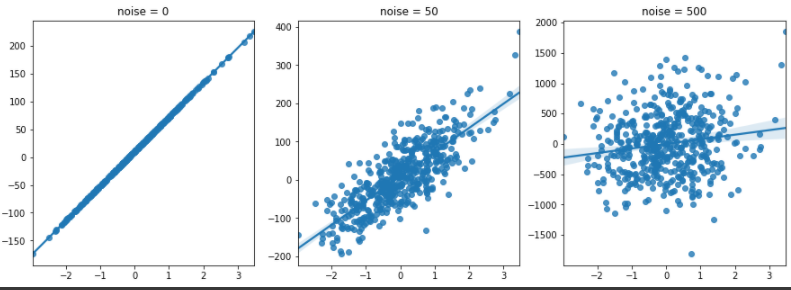

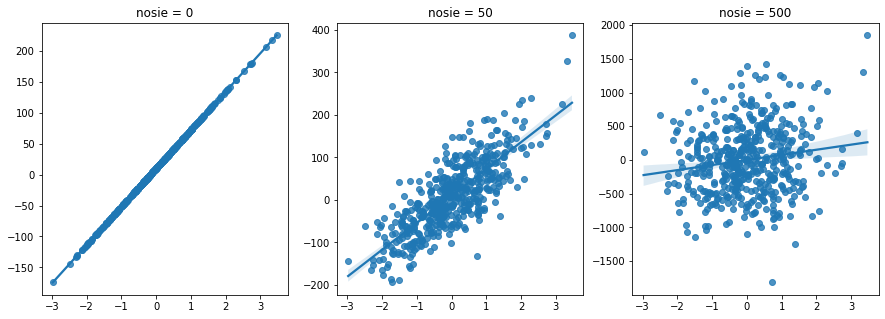

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
# matplotlib에는 피겨(figure)와 액시즈(axes)라는 개념이 있다. 피겨는 그림을 가리키고, 
# 액시즈는 그림에 포함된 하나의 그래프를 가리킨다.

# fig는 전체 figurefig란 figure로써 - 전체 subplot을 말한다. ex) 서브플로안에 몇개의 그래프가 있던지 상관없이  그걸 담는 하나.전체 사이즈를 말한다.
# ax는 axe로써 - 전체 중 낱낱개를 말한다 ex) 서브플롯 안에 2개(a1,a2)의 그래프가 있다면 a1, a2 를 일컬음
# axes는 3x1의 배열이며, 각 차트에 대응한다.

fig, axes = plt.subplots(ncols=3,figsize=(15,5))

axes[0].set_title('nosie = 0')
axes[1].set_title('nosie = 50')
axes[2].set_title('nosie = 500')


ax_0=sns.regplot(X_0,y_0,ax=axes[0])
ax_50=sns.regplot(X_50,y_50,ax=axes[1])
ax_500=sns.regplot(X_500,y_500,ax=axes[2])

plt.show()

## 문제 3

### 3.1

sklearn 패키지의 boston 데이터셋을 로드하여 boston 변수에 저장하세요.

boston 데이터를 출력해보세요.



(실행 결과)

    {'DESCR': ".. _boston_dataset:\n\nBoston house prices  
    ,,,,,,,,,,,,,,
    'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
            4.9800e+00],
            [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
    ,,,,,,,,,,,,,,
            [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
            7.8800e+00]]),
    'feature_names': array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
            'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
    'filename': '/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv',
    'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
            18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
            15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
    ,,,,,,,,,,,,,,
            29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,
            20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,
            23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9])}

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

boston = load_boston()
boston

for i,k in enumerate(boston):
  print('---------------------------------------key:',k,'---------------------------------------',
        '\nvalues: ',boston[k])

---------------------------------------key: data --------------------------------------- 
values:  [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
---------------------------------------key: target --------------------------------------- 
values:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 

### 3.2

boston 데이터셋의 X값을 출력해보세요.



(실행 결과)

    array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
            4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
            9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
            4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
            5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
            6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
            7.8800e+00]])

In [ ]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

### 3.3
boston 데이터셋의 y값을 출력해보세요.

(실행 결과)

    array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
    ,,,,,,,,,,
        29.8, 13.8, 13.3, 16.7, 12. , 14.6, 21.4, 23. , 23.7, 25. , 21.8,
        20.6, 21.2, 19.1, 20.6, 15.2,  7. ,  8.1, 13.6, 20.1, 21.8, 24.5,
        23.1, 19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22. , 11.9])

In [ ]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### 3.4
boston 데이터셋의 feature 명을 출력해보세요.

(실행 결과)

    array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 3.5 
boston 데이터셋을 데이터프레임으로 변환하여 boston_df 변수에 저장하세요.

데이터프레임의 샘플 첫 5개를 출력해보세요.

(조건)
* 칼럼명은 boston 데이터셋의 feature_names를 사용하세요.

(Tip)
* pandas 라이브러리의 DataFrame(데이터, columns=칼럼명)을 사용하세요. 

(실행 결과)

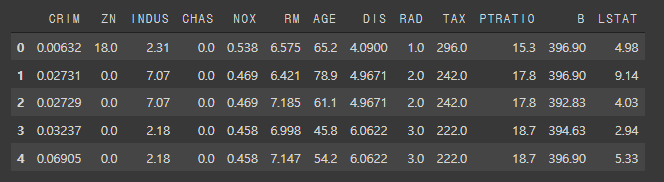

In [ ]:
boston_df = pd.DataFrame(boston,columns=boston['feature_names'])
boston_df
n = len(boston['data'])

for i,v in enumerate(boston['data']):
    boston_df.loc[i]=v

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 3.6

데이터프레임에 y 데이터를 추가하세요.

(조건)
* 칼럼명을 'PRICE'로 설정하세요.

In [ ]:
boston_df['PRICE']=boston['target']


print(np.shape(boston_df))
boston_df


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 3.7

데이터를 train_test_split()을 사용하여 다음 조건을 충족하는 훈련용, 검증용 데이터로 분리하세요. 
훈련용 데이터는 X_train, y_train, 검증용 데이터는 X_test, y_test 변수에 저장하세요. 

(조건)
* shufftle = True
* 전제 데이터 중 학습 데이터의 비율 (test_size) = 0.2
* random_state = 112

In [ ]:
from sklearn.model_selection import train_test_split

#훈련 80 X_train,y_train -> 404,13
#시험 20 X_test,y_test -> 404,
X_train,X_test,y_train,y_test = train_test_split(boston['data'],boston['target'],shuffle=True,test_size=0.2,random_state=112)

np.shape(X_train)

(404, 13)

### 3.8

LinearRegression()을 사용하여 선형회귀 모델을 로드하세요.

hypothesis 변수에 저장하세요. 


In [ ]:
from sklearn.linear_model import LinearRegression

hypothesis = LinearRegression()

### 3.9

fit() 명령어를 통해 학습 데이터로 앞서 로드한 모델을 학습시키세요.

In [ ]:
hypothesis.fit(X_train,y_train)

LinearRegression()

### 3.10
hypothesis의 계수와 bias를 출력하세요.

(Tip) 
* coef_에 계수가 저장되어 있어요.
* intercept_에 bias가 저장되어 있어요.

(실행 결과)

    learning finished..
    coef_: [-1.09364225e-01  3.31148852e-02  4.81510466e-02  3.64483413e+00
    -1.82471652e+01  4.53458444e+00 -4.62229997e-03 -1.25302264e+00
    2.85785917e-01 -1.09440413e-02 -9.63058608e-01  7.17756962e-03
    -4.83116732e-01]

    bias: 31.455098648991026

In [ ]:
print('learning finishied... \ncoef_: ',hypothesis.coef_)
print('\nbias: ',hypothesis.intercept_)

learning finishied... 
coef_:  [-1.18747858e-01  4.23710328e-02  2.52453360e-02  1.96499901e+00
 -1.54133839e+01  3.86330120e+00 -5.79047173e-03 -1.40507764e+00
  3.02219318e-01 -1.27228053e-02 -8.89445170e-01  8.03287486e-03
 -5.34817775e-01]

bias:  34.71674998879367


### 3.11

score()을 사용하여 학습 데이터 점수, 검증 데이터 점수를 출력하세요.

(실행 결과)

    학습 데이터 점수: 0.7514
    검증 데이터 점수: 0.6631

In [ ]:
print('학습 데이터 점수 : ',round(hypothesis.score(X_train,y_train),2))
print('검증 데이터 점수 : ',round(hypothesis.score(X_test,y_test),2))

학습 데이터 점수 :  0.72
검증 데이터 점수 :  0.79


### 3.12

hypothesis의 X_test 데이터에 대한 예측 값을 출력해보세요. 

(Tip)
* predict(데이터)를 사용하세요.

(실행 결과)

    array([17.25870044, 28.04468464, 19.52114687, 29.31781583, 18.82490083,
        28.48120714, 40.72753413, 18.25348604, 13.19429573, 14.67879555,
        15.71289059, 20.94748868, 25.36462277, 16.17043607, 28.94535421,
        17.18370932, 25.38594797, 18.75017091, 20.55303447, 24.72406929,
        19.17050602, 13.11009389, 20.23587036, 17.58188373,  9.15782215,
        24.33521648, 11.66933707, 32.28418988, 30.3454137 , 19.78665524,
        15.05907145, 27.28071953, 28.95527852, 18.95548947, 28.42846963,
        15.37776353, 16.56864163, 21.80531387, 16.73343475, 19.95028731,
        19.97156009, 24.16430427, 23.06466634, 13.69233583, 19.37932695,
        13.56753317, 36.74991598, 39.639337  , 18.05802813,  4.98261268,
        16.56365982, 33.39675644, 15.45957994, 35.85352891, 41.69048265,
        26.86519159, 14.25938626, 20.23544804, 24.77246978, 22.23185353,
            9.01604923, 24.6352428 , 36.24289644, 16.94342269, 35.10002203,
        18.26652883, 18.95161846, 23.43048929, 27.17573083, 19.30151264,
        17.08480032, 21.56784226, 13.39371376, 17.03450159, 23.08813161,
        16.78158203, 24.25685729, 19.78240505, 15.79617735, 11.15076866,
        21.20133989, 28.92988238, 34.48623478,  5.40299475, 21.32746017,
        18.21550393, 15.75382591, 27.95906854, 21.99363608, 18.99180248,
        37.27324158, 20.86844146, 25.6948844 , 15.74240502, 15.62935218,
        30.39226374, 32.50103024, 20.84338026, 22.59377784, 17.76832414,
        17.27268718, 19.52352911])

In [ ]:
hypothesis.predict(X_test)

array([22.30367933, 22.04857939,  1.5177575 , 27.65036749, 15.6373815 ,
       16.07292692, 24.20192331,  0.18494842, 20.51087765, 19.41127312,
       11.19986758, 19.99474084, 25.09687198, 20.79362301, 17.70368981,
       28.61726037, 14.66751895, 19.70755271, 22.5818668 , 28.9469412 ,
       29.36189985, 32.26057426, 17.22217619, 18.71779826, 25.19156369,
       34.16535276, 20.40532691, 32.96790166, 22.46211478, 23.20465463,
       18.37906163, 13.94744371, 28.57319809, 39.75050919, 22.1674731 ,
       22.27194919,  9.68360314, 25.60366218, 15.95834149, 24.71000114,
       15.04252272, 11.50497425, 37.34666679, 31.34793323, 12.69139692,
       34.27856247, 15.85471939, 20.99312197, 18.30553477, 23.24973088,
       13.7334616 , 15.14420211, 34.91488638,  6.15529976, 21.46600981,
        5.17761613, 26.27683331, 25.00874295, 20.75823567, 28.94972861,
       33.86657635, 13.87564095, 25.71882351, 18.1585236 , 18.62083451,
       34.94984864, 19.55499429, 20.44779289, 21.34047723, 35.81